# Hopefully this is a good place to start - Derek


In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Explore Details

In [174]:
attendance_18_19 = pd.read_csv('18-19 attendance master.csv')
demog = pd.read_csv('PvH-demographicsdash_childdata.csv')

In [175]:
attendance_18_19

,School Year,ChildID,AttendanceDate,Attendance,Center,Classroom,Session,Session_detail,ProgramType,AbsenceCodeDesc
0,18-19,57894,10/15/2018,Best Interest,FH,NaN,FD,NaN,FH,Best Interest
1,18-19,61922,11/28/2018,Best Interest,FH,NaN,FD,NaN,FH,Best Interest
2,18-19,61522,12/7/2018,Best Interest,FH,NaN,FD,NaN,FH,Best Interest
3,18-19,49392,12/13/2018,Best Interest,FH,NaN,FD,NaN,FH,Best Interest
4,18-19,52902,12/17/2018,Best Interest,FH,NaN,FD,NaN,FH,Best Interest
...,...,...,...,...,...,...,...,...,...,...
676475,18-19,59942,6/27/2019,Unexcused Absence,Cox,149.0,PD,PM,Preschool,Unexcused Absence
676476,18-19,61001,9/27/2018,Unexcused Absence,Decoto,40.0,PD,PM,Preschool,Unexcused Absence
676477,18-19,56838,4/8/2019,Unexcused Absence,Grant,109.0,PD,PM,Preschool,Unexcused Absence
676478,18-19,61984,2/26/2019,Unexcused Absence,Hillview,47.0,PD,PM,Preschool,Unexcused Absence


In [176]:
attendance_18_19.columns

Index(['School Year', 'ChildID', 'AttendanceDate', 'Attendance', 'Center',
       'Classroom', 'Session', 'Session_detail', 'ProgramType',
       'AbsenceCodeDesc'],
      dtype='object')

What is Best Interest? What goes into Other? What labels count as T/F?

In [177]:
attendance_18_19["Attendance"].value_counts()

In Attendance        554015
Sick                  79336
Best Interest         22262
Other                 14835
Unexcused Absence      6032
Name: Attendance, dtype: int64

In [178]:
demog

,ChildDateofBirth,ChildEthnicity,ChildFlags,ChildID,ChildLanguage,ChildRace
0,06/07/2008,Hispanic or Latino,Limited English,35700.0,01 -- Spanish,Caucasian
1,11/29/2001,Hispanic or Latino,State Preschool,18770.0,01 -- Spanish,Caucasian
2,04/12/2006,Hispanic or Latino,State Preschool,30617.0,00 -- English,Caucasian
3,02/01/2007,Not Hispanic or Latino,Limited English,32428.0,55 -- Other Languages of China,Asian
4,02/14/2011,Not Hispanic or Latino,NaN,38641.0,28 -- Punjabi,NaN
...,...,...,...,...,...,...
83771,02/28/2005,Hispanic or Latino,State Preschool,24303.0,01 -- Spanish,Caucasian
83772,10/11/2009,Hispanic or Latino,NaN,39483.0,01 -- Spanish,Caucasian
83773,02/20/2003,Hispanic or Latino,NaN,40617.0,00 -- English,NaN
83774,07/05/2010,Hispanic or Latino,Limited English,40858.0,01 -- Spanish,Caucasian


In [179]:
demog.isnull() 

,ChildDateofBirth,ChildEthnicity,ChildFlags,ChildID,ChildLanguage,ChildRace
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,True,False,False,True
...,...,...,...,...,...,...
83771,False,False,False,False,False,False
83772,False,False,True,False,False,False
83773,False,False,True,False,False,True
83774,False,False,False,False,False,False


In [180]:
demog.columns # Add age

Index(['ChildDateofBirth', 'ChildEthnicity', 'ChildFlags', 'ChildID',
       'ChildLanguage', 'ChildRace'],
      dtype='object')

In [181]:
demog["ChildFlags"].value_counts()

Limited English                                7723
Admissions Agreement #14 (check box if Yes)    7116
Preschool                                      6347
Admissions Agreement #15 (check box if Yes)    6064
Admissions Agreement #16 (check box if Yes)    5307
Infant/Toddler                                 2432
School Age                                     2420
State Preschool                                1993
Shelter-In-Place                               1567
Inactive:  Head Start Santa Clara County        950
IEP                                             765
Inactive:  Head Start Alameda County            668
IFSP                                            418
Inclusion Program                               185
Foster Child                                    175
Head Start                                      118
Emergency Care                                   75
Kidango Staff School Age                         46
Inactive:  Head Start CAPE                       39
RCEB        

# Attendance Data by Student (Data Frame) cleaned

## ROWS:
 -SID *

## COLUMNS:
-BI count *

-IA count *

-Sick count *

-Other count *

-Unexc count *

-Total days *

-Total days in attendance *

-Total absense (other + unexc + sick) *

-Rate of Attendance *

-Part Day *

-Full Day * 

-Center


In [190]:
attendance_18_19

,School Year,ChildID,AttendanceDate,Attendance,Center,Classroom,Session,Session_detail,ProgramType,AbsenceCodeDesc
0,18-19,57894,10/15/2018,Best Interest,FH,NaN,FD,NaN,FH,Best Interest
1,18-19,61922,11/28/2018,Best Interest,FH,NaN,FD,NaN,FH,Best Interest
2,18-19,61522,12/7/2018,Best Interest,FH,NaN,FD,NaN,FH,Best Interest
3,18-19,49392,12/13/2018,Best Interest,FH,NaN,FD,NaN,FH,Best Interest
4,18-19,52902,12/17/2018,Best Interest,FH,NaN,FD,NaN,FH,Best Interest
...,...,...,...,...,...,...,...,...,...,...
676475,18-19,59942,6/27/2019,Unexcused Absence,Cox,149.0,PD,PM,Preschool,Unexcused Absence
676476,18-19,61001,9/27/2018,Unexcused Absence,Decoto,40.0,PD,PM,Preschool,Unexcused Absence
676477,18-19,56838,4/8/2019,Unexcused Absence,Grant,109.0,PD,PM,Preschool,Unexcused Absence
676478,18-19,61984,2/26/2019,Unexcused Absence,Hillview,47.0,PD,PM,Preschool,Unexcused Absence


In [293]:
one_hot_atten = pd.get_dummies(attendance_18_19['Attendance'])
one_hot_sesh = pd.get_dummies(attendance_18_19['Session'])
attendance_clean = attendance_18_19.join(one_hot_atten)
attendance_clean = attendance_clean.join(one_hot_sesh)
attendance_clean

,School Year,ChildID,AttendanceDate,Attendance,Center,Classroom,Session,Session_detail,ProgramType,AbsenceCodeDesc,Best Interest,In Attendance,Other,Sick,Unexcused Absence,FD,PD
0,18-19,57894,10/15/2018,Best Interest,FH,NaN,FD,NaN,FH,Best Interest,1,0,0,0,0,1,0
1,18-19,61922,11/28/2018,Best Interest,FH,NaN,FD,NaN,FH,Best Interest,1,0,0,0,0,1,0
2,18-19,61522,12/7/2018,Best Interest,FH,NaN,FD,NaN,FH,Best Interest,1,0,0,0,0,1,0
3,18-19,49392,12/13/2018,Best Interest,FH,NaN,FD,NaN,FH,Best Interest,1,0,0,0,0,1,0
4,18-19,52902,12/17/2018,Best Interest,FH,NaN,FD,NaN,FH,Best Interest,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676475,18-19,59942,6/27/2019,Unexcused Absence,Cox,149.0,PD,PM,Preschool,Unexcused Absence,0,0,0,0,1,0,1
676476,18-19,61001,9/27/2018,Unexcused Absence,Decoto,40.0,PD,PM,Preschool,Unexcused Absence,0,0,0,0,1,0,1
676477,18-19,56838,4/8/2019,Unexcused Absence,Grant,109.0,PD,PM,Preschool,Unexcused Absence,0,0,0,0,1,0,1
676478,18-19,61984,2/26/2019,Unexcused Absence,Hillview,47.0,PD,PM,Preschool,Unexcused Absence,0,0,0,0,1,0,1


In [295]:
attendance_18_19_clean = attendance_clean.groupby(['ChildID'],as_index=False).agg({'Best Interest': 'sum','In Attendance': 'sum','Other': 'sum', 'Sick':'sum','Unexcused Absence':'sum', 'FD':'sum','PD':'sum'})

attendance_18_19_clean['Total Attendance'] = attendance_18_19_clean['Best Interest'] + attendance_18_19_clean['In Attendance']
attendance_18_19_clean['Total Absence'] = attendance_18_19_clean['Other'] + attendance_18_19_clean['Sick'] + attendance_18_19_clean['Unexcused Absence']
attendance_18_19_clean['Total Days'] = attendance_18_19_clean['Total Attendance'] + attendance_18_19_clean['Total Absence']
attendance_18_19_clean['Attendance Rate'] = attendance_18_19_clean['Total Attendance'] / attendance_18_19_clean['Total Days']

In [296]:
attendance_18_19_clean

,ChildID,Best Interest,In Attendance,Other,Sick,Unexcused Absence,FD,PD,Total Attendance,Total Absence,Total Days,Attendance Rate
0,18578,0,102.0,0,0,0,102.0,0,102.0,0,102.0,1.000000
1,22717,0,245.0,2,1,0,248.0,0,245.0,3,248.0,0.987903
2,25173,0,242.0,2,4,0,248.0,0,242.0,6,248.0,0.975806
3,30829,0,246.0,2,0,0,248.0,0,246.0,2,248.0,0.991935
4,31583,3,232.0,1,10,0,246.0,0,235.0,11,246.0,0.955285
...,...,...,...,...,...,...,...,...,...,...,...,...
4781,65271,0,2.0,0,0,0,0.0,2,2.0,0,2.0,1.000000
4782,65289,0,1.0,0,0,0,1.0,0,1.0,0,1.0,1.000000
4783,65290,0,3.0,0,0,0,3.0,0,3.0,0,3.0,1.000000
4784,65301,0,1.0,0,0,0,1.0,0,1.0,0,1.0,1.000000


<AxesSubplot:xlabel='Attendance Rate', ylabel='Count'>

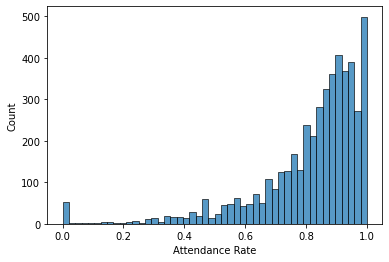

In [288]:
sns.histplot(data = attendance_18_19_clean, x = 'Attendance Rate')

# Clean Demog

## ROWS:
-SID

## COLUMNS:
-Race
-Ethnicity
-Age(As of 10/2022)
-Language 

# Demographics of Attendance > 80% vs Attendance < 80 %

# Race, Ethnicity, Age, Location